# Colossus tutorial: Halo mass function

Welcome to the Colossus halo mass function tutorial.

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We begin by setting a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18');

The halo mass function quantifies how many halos there are of a given mass. All models implemented in Colossus specify this abundance in units of $f(\sigma)$, the natural units in Press-Schechter theory. However, for many purposes, more intuitive units are desired. Let's make a plot of the mass function according to [Tinker et al. 2008](http://adsabs.harvard.edu/abs/2008ApJ...688..709T) at a few redshifts:

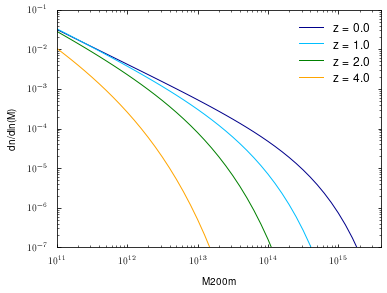

In [3]:
from colossus.lss import mass_function

z = [0.0, 1.0, 2.0, 4.0]
M = 10**np.arange(11.0, 15.5, 0.1)

plt.figure()
plt.xlabel('M200m')
plt.ylabel('dn/dln(M)')
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

The redshift evolution is mostly due to the change of $\sigma(M)$, as in the relation between mass and variance (and thus peak height). At fixed peak height, the function changes only mildly. Now let's compare some models for the FOF mass function:

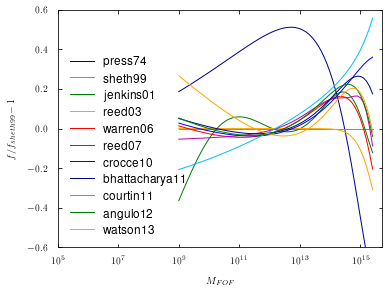

In [4]:
z = 0.0
M = 10**np.arange(9.0, 15.5, 0.1)

plt.figure()
plt.xscale('log')
plt.xlabel('$M_{FOF}$')
plt.ylabel('$f/f_{sheth99} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'sheth99')
for model in mass_function.models:
    if 'fof' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = 'fof', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);

Let's make the same plot but for the SO mass function, say $M_{\rm 200m}$. Some models can handle arbitrary mass definitions indicated by `*` in their `mdefs` field.

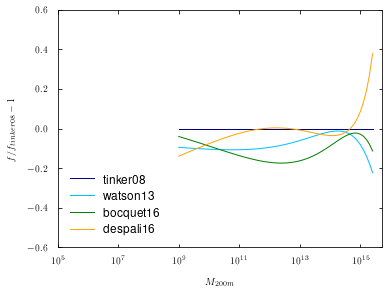

In [5]:
plt.figure()
plt.xscale('log')
plt.xlabel('$M_{200m}$')
plt.ylabel('$f/f_{tinker08} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'tinker08', mdef = '200m')
for model in mass_function.models:
    if '200m' in mass_function.models[model].mdefs or '*' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = '200m', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);

And finally, we make the same plot but for $M_{\rm vir}$.

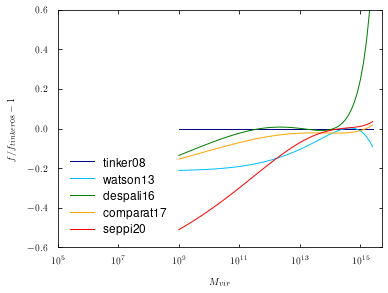

In [6]:
plt.figure()
plt.xscale('log')
plt.xlabel('$M_{vir}$')
plt.ylabel('$f/f_{tinker08} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'tinker08', mdef = 'vir')
for model in mass_function.models:
    if 'vir' in mass_function.models[model].mdefs or '*' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = 'vir', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);

The seppi20 model can also compute the conditional mass function with additional dependencies on the offset parameter (the displacement between the halo center of mass and the peak of its mass profile) and the Peebles spin parameter. These can be specified with the boolean parameters `int_over_xoff` and `int_over_spin`. If a quantity is not integrated over, the dimensionality of the output array increases.

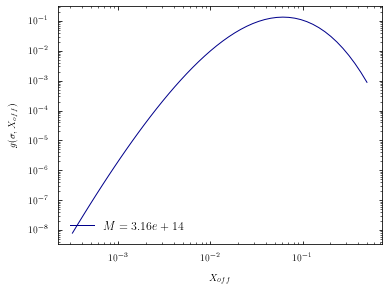

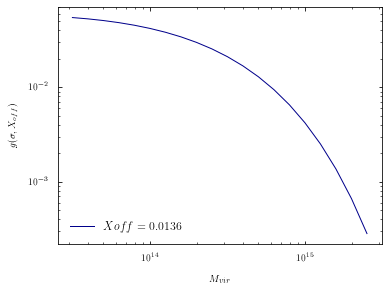

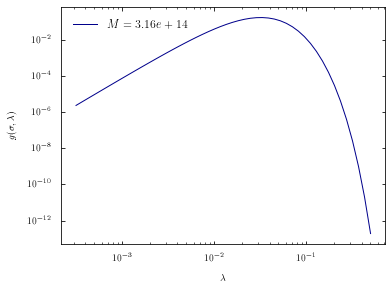

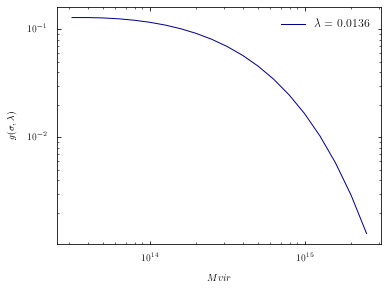

In [7]:
z = 0.0
M = 10**np.arange(13.5, 15.5, 0.1)
xoff = np.logspace(-3.5, -0.3, 50)
spin = np.logspace(-3.5, -0.3, 50)

plt.figure()
plt.loglog()
plt.xlabel('$X_{off}$')
plt.ylabel('$g(\sigma, X_{off})$')
g_sigma_xoff = mass_function.massFunction(M, z, xoff = xoff, mdef = 'vir', model = 'seppi20', int_over_xoff = False) 
plt.plot(xoff, g_sigma_xoff[int(len(M)/2), :], label = r'$M = %.3g$' % (M[int(len(M)/2)]))
plt.legend(loc = 3);

plt.figure()
plt.loglog()
plt.xlabel('$M_{vir}$')
plt.ylabel('$g(\sigma, X_{off})$')
g_sigma_xoff = mass_function.massFunction(M, z, xoff = xoff, mdef = 'vir', model = 'seppi20', int_over_xoff = False) 
plt.plot(M, g_sigma_xoff[:,int(len(xoff)/2)], label = r'$Xoff = %.3g$' % (xoff[int(len(xoff)/2)]))
plt.legend(loc = 3);

plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$g(\sigma, \lambda)$')
g_sigma_spin = mass_function.massFunction(M, z, spin = spin, mdef = 'vir', model = 'seppi20', int_over_spin = False) 
plt.plot(xoff, g_sigma_spin[int(len(M)/2),:], label = r'$M = %.3g$' % (M[int(len(M)/2)]))
plt.legend();

plt.figure()
plt.loglog()
plt.xlabel('$Mvir$')
plt.ylabel('$g(\sigma, \lambda)$')
g_sigma_spin = mass_function.massFunction(M, z, spin = spin, mdef = 'vir', model = 'seppi20', int_over_spin = False) 
plt.plot(M, g_sigma_spin[:,int(len(spin)/2)], label = r'$\lambda = %.3g$' % (spin[int(len(spin)/2)]))
plt.legend();

The model can also integrate over the mass (or variance) and produce the conditional mass function in spin-offset space.

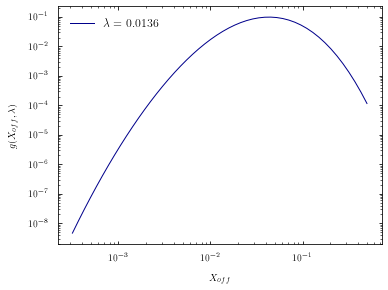

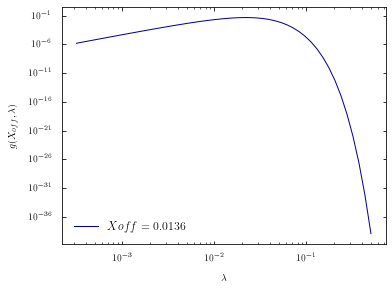

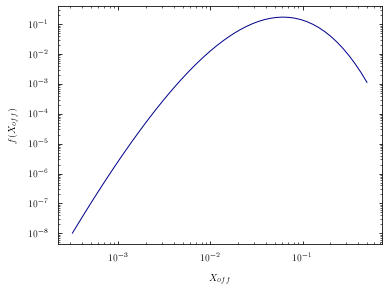

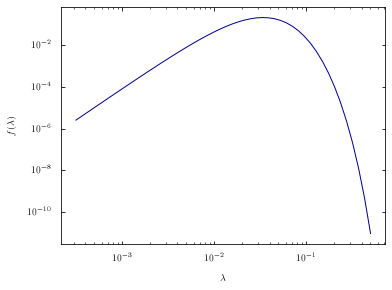

In [8]:
plt.figure()
plt.loglog()
plt.xlabel('$X_{off}$')
plt.ylabel('$g(X_{off}, \lambda)$')
g_xoff_spin = mass_function.massFunction(M, z, xoff = xoff, spin = spin, mdef = 'vir', model = 'seppi20', int_over_sigma = True, int_over_xoff = False, int_over_spin = False) 
plt.plot(xoff, g_xoff_spin[:, int(len(spin)/2)], label = r'$\lambda = %.3g$' % (spin[int(len(spin)/2)]))
plt.legend(); 

plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$g(X_{off},\lambda)$')
g_xoff_spin = mass_function.massFunction(M, z, xoff = xoff, spin = spin, mdef = 'vir', model = 'seppi20', int_over_sigma = True, int_over_xoff = False, int_over_spin = False) 
plt.plot(spin, g_xoff_spin[int(len(xoff)/2), :], label = r'$Xoff = %.3g$' % (xoff[int(len(xoff)/2)]))
plt.legend();

plt.figure()
plt.loglog()
plt.xlabel('$X_{off}$')
plt.ylabel('$f(X_{off})$')
f_xoff = mass_function.massFunction(M, z, xoff = xoff, spin = spin, mdef = 'vir', model = 'seppi20', int_over_sigma = True, int_over_xoff = False) 
plt.plot(xoff, f_xoff);

plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')
f_spin = mass_function.massFunction(M, z, xoff = xoff, spin = spin, mdef = 'vir', model = 'seppi20', int_over_sigma = True, int_over_spin = False) 
plt.plot(spin, f_spin);